# Natural Language Processing(NLP)
* Broad topic that we can only touch on
* Typically involves ingesting text for analysis or modeling
* Commonly used NLP libraries
    * [NLTK](https://www.nltk.org/) -- partially installed with Anaconda
    * [Beautiful soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) -- html parser
    * [Wordcloud](https://pypi.org/project/wordcloud/)

In [1]:
from bs4 import BeautifulSoup as bs # no, the pun is not lost 
import requests

In [2]:
url ="https://alphabench.com/data/python-loan-analysis.html"


In [3]:
# Step 1: Get the raw HTML
response = requests.get(url)
html = response.text

In [4]:
# get the first paragraph, with and without tag

# Step 2: Parse the HTML using BeautifulSoup
soup = bs(html, 'html.parser')

# Step 3: Get the first paragraph (with and without the tag)
first_paragraph = soup.find('p')
print("First Paragraph (with HTML):", first_paragraph)
print("First Paragraph (text only):", first_paragraph.text)

First Paragraph (with HTML): <p>In the following video tutorials, we're going to be making a loan class to handle some of the common, repetitive tasks that are involved in loan analysis and then make an application based on the class. So when we're done, not only will you have a menu driven application, but you will also be able to import and use the class in your Python applications. <a href="https://github.com/mjmacarty/numpy_financial">You can download the code from Github</a>.</p>
First Paragraph (text only): In the following video tutorials, we're going to be making a loan class to handle some of the common, repetitive tasks that are involved in loan analysis and then make an application based on the class. So when we're done, not only will you have a menu driven application, but you will also be able to import and use the class in your Python applications. You can download the code from Github.


In [5]:
# get the text of all hyperlinks

# Step 4: Get text of all hyperlinks
hyperlink_texts = [a.text for a in soup.find_all('a')]
print("Hyperlink Texts:", hyperlink_texts)

Hyperlink Texts: ['Follow @mjmacarty', 'Home', 'About', 'Programs', 'Contact', 'Publications', 'Resources', 'FAQ', 'You can download the code from Github', 'Skip down to the video tutorial', 'Get the notebooks here.']


In [6]:
# get the URLs for all hyperlinks

# Step 5: Get URLs of all hyperlinks
hyperlink_urls = [a['href'] for a in soup.find_all('a', href=True)]
print("Hyperlink URLs:", hyperlink_urls)

Hyperlink URLs: ['https://twitter.com/mjmacarty?ref_src=twsrc%5Etfw', '../index.html', '../about.html', '../programs.html', '../contact.html', '../publications.html', '../resources.html', '../faq.html', 'https://github.com/mjmacarty/numpy_financial', '#video', 'https://github.com/mjmacarty/numpy_financial']


In [7]:
# get text in paragraphs

# Step 6: Get all text within paragraph tags
paragraphs = [p.text for p in soup.find_all('p')]
print("All Paragraph Texts:", paragraphs)

All Paragraph Texts: ["In the following video tutorials, we're going to be making a loan class to handle some of the common, repetitive tasks that are involved in loan analysis and then make an application based on the class. So when we're done, not only will you have a menu driven application, but you will also be able to import and use the class in your Python applications. You can download the code from Github.", 'Skip down to the video tutorial', "The application will handle a number of common loan analysis tasks, very simply with minimal user inputs  the interest rate, the term and the amount of money we're borrowing. With just hose three inputs you can call payment, generate a summary and amortization table. You can always add functionality to your analyzer to make it better fit your needs.", "I have arbitrarily decided what a loan summary should look like, so if you don't like the summary I have come up with, you can add outputs to it as you see fit. Our class will also allow yo

In [8]:
# tokenize text from webpage
from nltk.tokenize import RegexpTokenizer

# Combine all paragraph text into one string
combined_text = " ".join(paragraphs)

# Tokenize words (remove punctuation using regex)
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(combined_text.lower())
print("Tokens:", tokens[:20])  # Display first 20 tokens


Tokens: ['in', 'the', 'following', 'video', 'tutorials', 'we', 're', 'going', 'to', 'be', 'making', 'a', 'loan', 'class', 'to', 'handle', 'some', 'of', 'the', 'common']


### Word frequencies, bigrams, etc

In [9]:
from nltk import ngrams, FreqDist

# Generate bigrams (n=2)
bigrams = list(ngrams(tokens, 2))
print("Sample Bigrams:", bigrams[:10])  # Display first 10 bigrams

# Calculate word frequencies
freq_dist = FreqDist(tokens)
print("Most Common Words:", freq_dist.most_common(10))


Sample Bigrams: [('in', 'the'), ('the', 'following'), ('following', 'video'), ('video', 'tutorials'), ('tutorials', 'we'), ('we', 're'), ('re', 'going'), ('going', 'to'), ('to', 'be'), ('be', 'making')]
Most Common Words: [('to', 47), ('the', 46), ('we', 37), ('you', 26), ('and', 25), ('a', 24), ('will', 22), ('loan', 15), ('of', 14), ('our', 14)]


### Sentiment Analysis

In [10]:
# sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download VADER resources (if needed)
nltk.download('vader_lexicon')

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Analyze sentiment of the combined text
sentiment = sia.polarity_scores(combined_text)
print("Sentiment Analysis Scores:", sentiment)

[nltk_data] Downloading package vader_lexicon to C:\Users\Divya
[nltk_data]     Gunasekaran\AppData\Roaming\nltk_data...


Sentiment Analysis Scores: {'neg': 0.013, 'neu': 0.877, 'pos': 0.11, 'compound': 0.9979}


### Word Cloud

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 

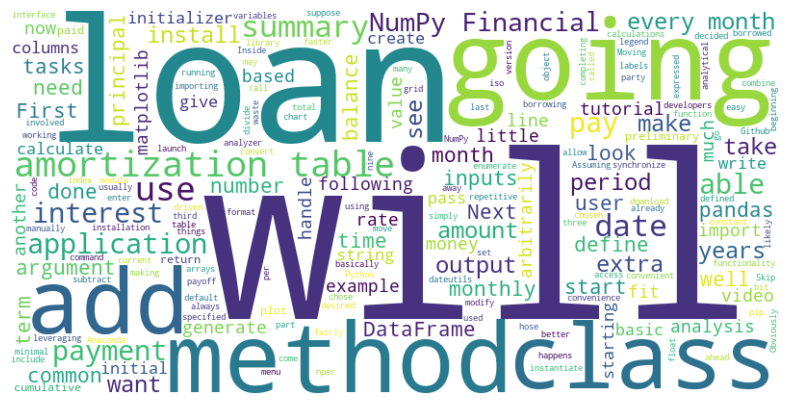

In [12]:
# Define stopwords to exclude common words
stopwords = set(STOPWORDS)

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stopwords
).generate(combined_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()